In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Loading UD modules

In [2]:
import pandas as pd
import numpy as np 

import torch
import data_utils as dutils   
import model_utils as mutils  
import plot_utils as putils   
import regularization 
import model_cifar   
import matplotlib.pyplot as plt
import seaborn as sns
import models as mod

import os

# Check GPU avaiability

In [3]:
device = dutils.get_device()

CUDA Available? True
Device is cuda:0


In [4]:
device.type

'cuda'

In [5]:
cuda = torch.cuda.is_available()

In [6]:
cuda

True

# CIFAR10 Basics

In [7]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

# CUDA?
if device.type == 'cuda':
    torch.cuda.manual_seed(SEED)
else:
    torch.manual_seed(SEED)

# Load CIFAR10 dataset

In [8]:
os.getcwd()

'/home/jd/Desktop/EVA5/SESSION7'

In [9]:
path = os.getcwd()
path

'/home/jd/Desktop/EVA5/SESSION7'

In [10]:
# load CIFAR10 dataset
train_loader, test_loader = dutils.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path )

Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified


# Data mage Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

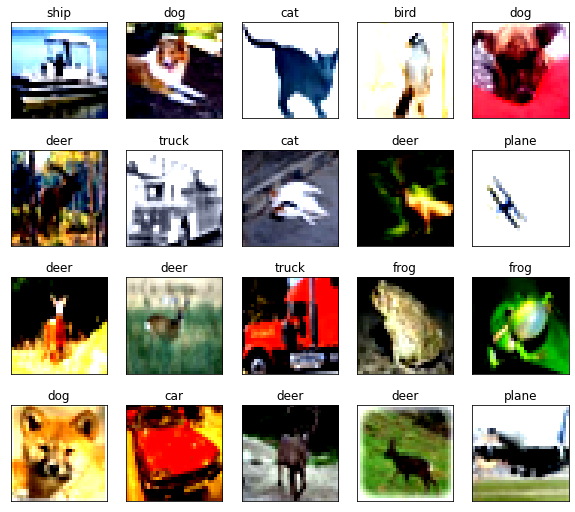

In [11]:
#Plot 20 random images
putils.plot_dataset_images(device, classes, train_loader)

### Model stracture

In [12]:
model = mod.ResNet18()

In [13]:
mutils.model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [14]:
# Create CIFAR10 network
# model = model_cifar.Net(dropout_value = 0.05)
# mutils.model_summary(model, device, input_size=(3, 32, 32))

# Build and train model

In [15]:
test_loader

In [16]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 40
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = mutils.build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=True,
                                                            L2_penalty_val=0.001)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


/home/jd/anaconda3/envs/eva5/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.564854, Accuracy: 4448/10000 (44.48%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.250113, Accuracy: 5624/10000 (56.24%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.085220, Accuracy: 6260/10000 (62.60%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.097342, Accuracy: 6350/10000 (63.50%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.941853, Accuracy: 6772/10000 (67.72%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.892362, Accuracy: 6934/10000 (69.34%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.063191, Accuracy: 6590/10000 (65.90%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.773937, Accuracy: 7388/10000 (73.88%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.406299, Accuracy: 8637/10000 (86.37%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.407089, Accuracy: 8652/10000 (86.52%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.439938, Accuracy: 8591/10000 (85.91%)

EPOCH: 11


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.454746, Accuracy: 8604/10000 (86.04%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.494033, Accuracy: 8571/10000 (85.71%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.482882, Accuracy: 8616/10000 (86.16%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.480782, Accuracy: 8648/10000 (86.48%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.455300, Accuracy: 8689/10000 (86.89%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.452282, Accuracy: 8704/10000 (87.04%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.450830, Accuracy: 8688/10000 (86.88%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.459401, Accuracy: 8690/10000 (86.90%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.452383, Accuracy: 8698/10000 (86.98%)

EPOCH: 20


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.450640, Accuracy: 8708/10000 (87.08%)

EPOCH: 21


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.449205, Accuracy: 8701/10000 (87.01%)

EPOCH: 22


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.453375, Accuracy: 8695/10000 (86.95%)

EPOCH: 23


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.450313, Accuracy: 8706/10000 (87.06%)

EPOCH: 24


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.450687, Accuracy: 8703/10000 (87.03%)

EPOCH: 25


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.448799, Accuracy: 8712/10000 (87.12%)

EPOCH: 26


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.447634, Accuracy: 8704/10000 (87.04%)

EPOCH: 27


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.450904, Accuracy: 8703/10000 (87.03%)

EPOCH: 28


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.460416, Accuracy: 8700/10000 (87.00%)

EPOCH: 29


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.452801, Accuracy: 8704/10000 (87.04%)

EPOCH: 30


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.451463, Accuracy: 8705/10000 (87.05%)

EPOCH: 31


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.451105, Accuracy: 8700/10000 (87.00%)

EPOCH: 32


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.451887, Accuracy: 8705/10000 (87.05%)

EPOCH: 33


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.450975, Accuracy: 8711/10000 (87.11%)

EPOCH: 34


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.454079, Accuracy: 8709/10000 (87.09%)

EPOCH: 35


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.454782, Accuracy: 8705/10000 (87.05%)

EPOCH: 36


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.454720, Accuracy: 8699/10000 (86.99%)

EPOCH: 37


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.453597, Accuracy: 8688/10000 (86.88%)

EPOCH: 38


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.450111, Accuracy: 8683/10000 (86.83%)

EPOCH: 39


Loss=0.101103 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:40<00:00,  1.77it/s]



Test set: Average loss: 0.450170, Accuracy: 8702/10000 (87.02%)



# Test Accuracy

In [17]:
mutils.get_test_accuracy(model, device, test_loader)


Accuracy of the network on the 10000 test images: 87.02%



### Class level Accuracy

In [18]:

mutils.class_based_accuracy(model, device, classes, test_loader)

Accuracy of plane : 85 %
Accuracy of   car : 93 %
Accuracy of  bird : 78 %
Accuracy of   cat : 67 %
Accuracy of  deer : 65 %
Accuracy of   dog : 86 %
Accuracy of  frog : 83 %
Accuracy of horse : 92 %
Accuracy of  ship : 83 %
Accuracy of truck : 96 %


# Visualization


Ploting Accuracy and Loss history: Model CIFAR10



/home/jd/Desktop/EVA5/SESSION7/plot_utils.py:34: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,x_size+1),x_size/10)
/home/jd/Desktop/EVA5/SESSION7/plot_utils.py:45: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,x_size+1),x_size/10)


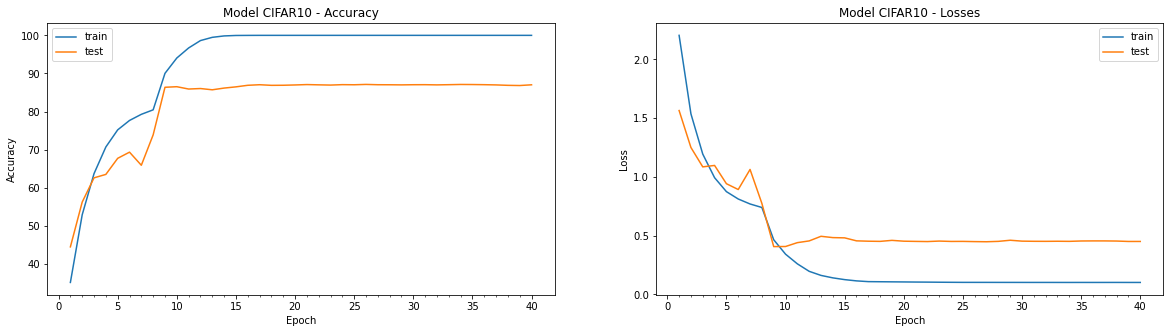

In [19]:
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
putils.plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

# Misclassified images


Ploting misclassified images: Model CIFAR10



/home/jd/Desktop/EVA5/SESSION7/plot_utils.py:93: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629395347/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  wrong_idx = (pred_marker == False).nonzero()  # get indices for wrong predictions
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow w

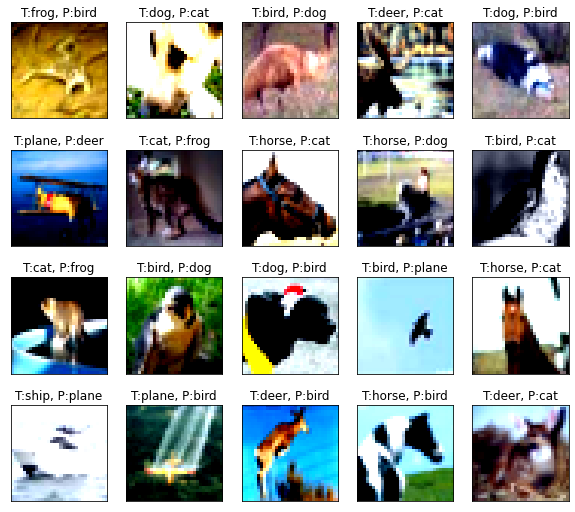

In [20]:
print ("\nPloting misclassified images: {}\n".format(model_name))

putils.miss_classification('Test',model, 
                          device, 
                          classes,
                          testloader=test_loader,
                          num_of_images = 20,
                          save_filename="model_misclassified")